# Working with NetCDF data

Let's calcluate monthly average. First let's open monthly average data. Note that this is not longterm averge data, but average for individual years.

In [2]:
import xarray as xr
file='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc'

ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lon: 144, time: 896, lat: 73)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-08-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                        Model
    Conventions:                     COARDS
    NCO:                             20121012
    history:                         Thu May  4 20:11:16 2000: ncrcat -d time...
    title:                           monthly mean air.sig995 from the NCEP Re...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

Calcuate monthly average temperature at each grid.

In [5]:
ts=ds.air
ts_clim = ts.groupby('time.month').mean(dim='time')
ts_clim  # longterm monthly mean

<xarray.DataArray 'air' (month: 12, lat: 73, lon: 144)>
array([[[-29.925573, -29.925573, -29.925573, ..., -29.925573,
         -29.925573, -29.925573],
        [-30.930286, -30.892467, -30.856377, ..., -31.046501,
         -31.00667 , -30.968483],
        [-30.813494, -30.527422, -30.241081, ..., -31.613802,
         -31.363285, -31.094713],
        ...,
        [-19.962837, -19.80653 , -19.654732, ..., -20.301004,
         -20.228569, -20.109613],
        [-20.748938, -20.772184, -20.79126 , ..., -20.62587 ,
         -20.677607, -20.717764],
        [-22.503916, -22.503916, -22.503916, ..., -22.503916,
         -22.503916, -22.503916]],

       [[-30.353668, -30.353668, -30.353668, ..., -30.353668,
         -30.353668, -30.353668],
        [-31.17704 , -31.122272, -31.068018, ..., -31.346869,
         -31.289745, -31.23327 ],
        [-30.93159 , -30.615898, -30.300592, ..., -31.810308,
         -31.535603, -31.241081],
...
        [-30.162933, -30.025242, -29.88619 , ..., -30.37608 ,
         -30.357038, -30.279495],
        [-30.618841, -30.660107, -30.691975, ..., -30.419962,
         -30.500904, -30.567007],
        [-31.28502 , -31.28502 , -31.28502 , ..., -31.28502 ,
         -31.28502 , -31.28502 ]],

       [[-28.570946, -28.570946, -28.570946, ..., -28.570946,
         -28.570946, -28.570946],
        [-29.619656, -29.5869  , -29.55372 , ..., -29.715382,
         -29.683296, -29.651873],
        [-29.685705, -29.421202, -29.152819, ..., -30.389933,
         -30.175455, -29.93892 ],
        ...,
        [-19.184015, -19.052477, -18.930988, ..., -19.470982,
         -19.409264, -19.308208],
        [-20.317219, -20.353872, -20.386581, ..., -20.159857,
         -20.221699, -20.27326 ],
        [-22.156166, -22.156166, -22.156166, ..., -22.156166,
         -22.156166, -22.156166]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Plot January average temperature.

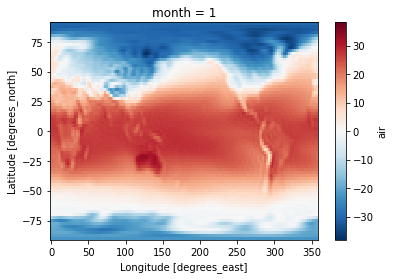

In [7]:
ts_clim.isel(month=0).plot()

### Exercise
Plot July average temperature

We could specify two dimensions and make a line plot. Let's make a monthly mean temperature plot for a grid point closest to providence.


/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


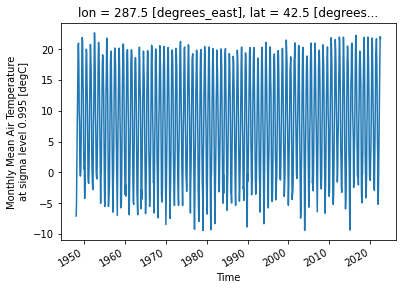

In [10]:
lat_pvd=41.8
lon_pvd=-71.4+360
ts_prov_mon=ts.sel(lat=lat_pvd,lon=lon_pvd , method='nearest').plot()

Now let's make a longterm mean temperature plot for a grid point closest to providence.

/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


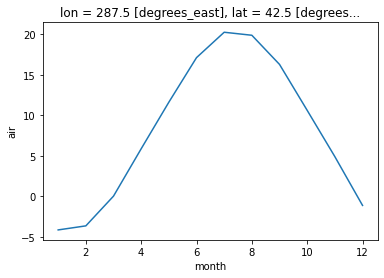

In [11]:
ts_prov_clim=ts_clim.sel(lat=lat_pvd,lon=lon_pvd , method='nearest')
ts_prov_clim.plot()

### Exercise
Choose a location that you'd like to look at, and make line plots of monthly mean and longterm mean temperature (similar to the examples above).